In [1]:
## Importing packages
library(datasets)   # library(help = "datasets")
library(tidyverse)  # install.packages("tidyverse"). ggplot2. Details https://www.tidyverse.org
library(caret)      # The caret package (short for Classification And REgression Training)
library(grid)       # grid is a low-level graphics system which provides a great deal of control and flexibility.
library(gridExtra)  # provides useful extensions to the grid system
library(GGally)     # Extension to 'ggplot2'. a plotting system based on the grammar of graphics
library(rpart)      # Rpart is machine learning library in R that is used for building classification & regression trees
library(rpart.plot) # to plot tree
library(corrplot)   # provides a visual exploratory tool on correlation matrix


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3     v purrr   0.3.2
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwr

In [2]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [3]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
v <- iris$Species

table(v)

v
    setosa versicolor  virginica 
        50         50         50 

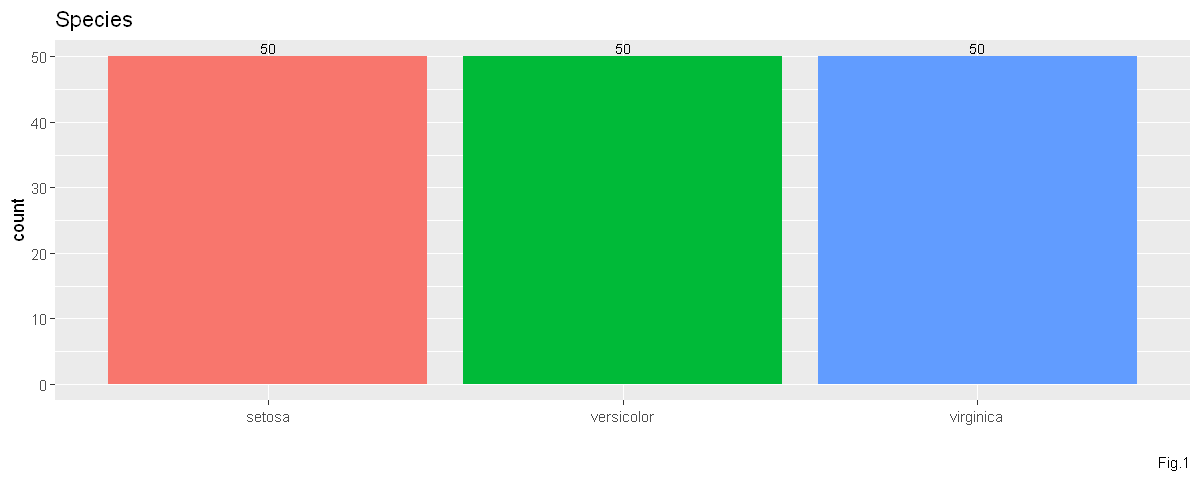

In [5]:
# %>% chain function together. i.e. iris %>% head() %>% summary(). 
# What the function does is to pass the left hand side of the operator to the first argument of 
# the right hand side of the operator.
# functions applied can be read from left to right rather than from inside out

fig(10, 4)
iris %>%  
    group_by(Species) %>%        
    summarise(count = n()) %>%
    ggplot(aes(x = Species, y = count, fill = Species),options(repr.plot.width=10, repr.plot.height=10)) + 
        geom_bar(stat = "identity") +
        geom_text(aes(label = as.character(count)), 
                 position = position_dodge(width = 1),
                 hjust = 0.5, vjust = -0.25, size = 3) +
        theme(legend.position = "none") +
        labs(title = "Species", x = "", caption = "Fig.1")


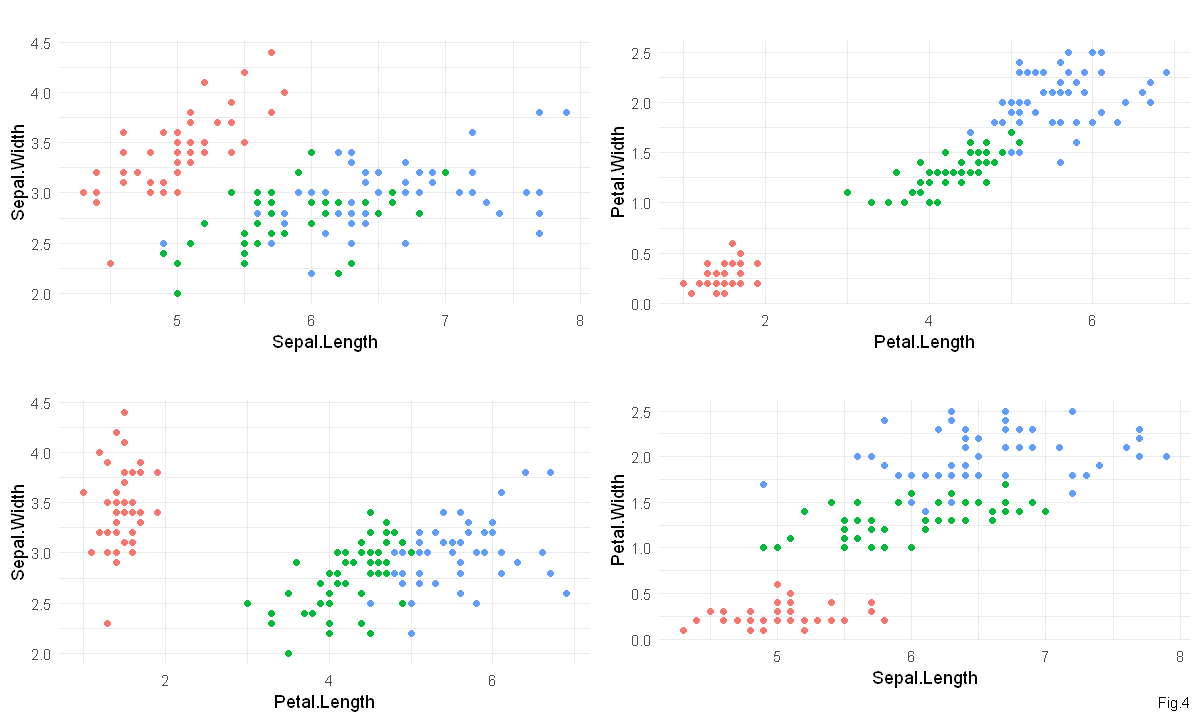

In [6]:
fig(10, 6)
f1 <- iris %>%
    group_by(Species, Sepal.Length, Sepal.Width) %>%
    ggplot(aes(Sepal.Length, Sepal.Width, color = Species)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "")

f2 <- iris %>%
    group_by(Species, Petal.Length, Petal.Width) %>%
    ggplot(aes(Petal.Length, Petal.Width, color = Species)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "")

f3 <- iris %>%
    group_by(Species, Petal.Length, Sepal.Width) %>%
    ggplot(aes(Petal.Length, Sepal.Width, color = Species)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "")

f4 <- iris %>%
    group_by(Species, Sepal.Length, Petal.Width) %>%
    ggplot(aes(Sepal.Length, Petal.Width, color = Species)) + 
        geom_point() +  
        theme_minimal() +
        theme(legend.position = "none") +
        labs(title = "", caption = "Fig.4")

grid.arrange(f1, f2, f3, f4, ncol = 2)

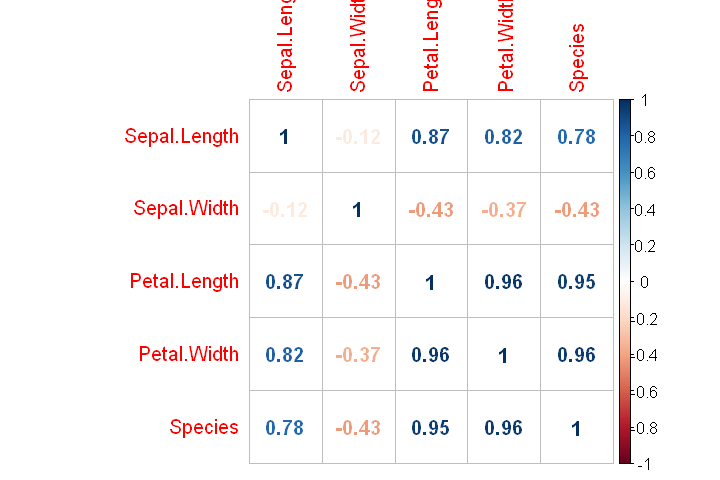

In [7]:
fig(6, 4)
all_num <- iris   # new dataframe
all_num$Species <- as.numeric(all_num$Species)  # Convert Factor to Numeric in R

# fix(all_num)

M<-cor(all_num)
corrplot(M, method="number")

In [8]:
# ## convert all values to numeric (especially the target)
# all_num <- iris
# all_num$Species <- as.numeric(all_num$Species)
# all_num %>% ggcorr(palette = "RdBu", label = TRUE)

In [9]:
runif(nrow(iris))

[1] 0.77816904 0.81335449 0.21172147 0.70962865 0.33941209 0.68518103
  [7] 0.12141360 0.75598197 0.44518506 0.28085978 0.29376559 0.02857564
 [13] 0.96267537 0.41090261 0.71483751 0.66893163 0.12076066 0.58302300
 [19] 0.65697319 0.78276226 0.51981031 0.11203620 0.19466585 0.89199045
 [25] 0.83842311 0.95885234 0.11260316 0.88754572 0.48066432 0.88346745
 [31] 0.19495000 0.41449966 0.27732551 0.31383451 0.22174792 0.63582423
 [37] 0.68558721 0.54687294 0.70628101 0.83083534 0.98764214 0.98901346
 [43] 0.30939285 0.41158104 0.14078541 0.87481836 0.69159406 0.73249713
 [49] 0.26031797 0.51944342 0.25317465 0.04519040 0.47827681 0.21179376
 [55] 0.81507294 0.10101706 0.35187248 0.20729833 0.45379029 0.49039111
 [61] 0.51528723 0.27695595 0.97924499 0.03414001 0.77670439 0.56494086
 [67] 0.67933235 0.01040065 0.94311490 0.31051196 0.73071757 0.51075964
 [73] 0.48321477 0.95211609 0.85049758 0.39294551 0.30280279 0.96546593
 [79] 0.64798456 0.50939452 0.08961260 0.24281327 0.81198144 0.44332863
 [85] 0.05537875 0.47250778 0.29371235 0.61739112 0.07010743 0.57700023
 [91] 0.39987594 0.47013534 0.97243578 0.01648289 0.26579462 0.59653771
 [97] 0.02467728 0.76944399 0.95767726 0.92334827 0.03721829 0.91311925
[103] 0.28621884 0.85905330 0.01736475 0.46956668 0.01049867 0.93792681
[109] 0.02078159 0.82935658 0.66918807 0.34880167 0.15530778 0.41563822
[115] 0.92037012 0.68297667 0.47848157 0.50017852 0.48415402 0.96470745
[121] 0.54859320 0.95166694 0.73319665 0.18789229 0.11162954 0.51267953
[127] 0.31050358 0.10738717 0.89840418 0.56607766 0.48190551 0.85145734
[133] 0.88098843 0.04062999 0.65198699 0.86520318 0.07209000 0.32576296
[139] 0.14961460 0.01820287 0.76883523 0.88529423 0.78874477 0.45733993
[145] 0.62006750 0.09569802 0.99833243 0.18565101 0.01437689 0.97813105

In [10]:
# it ensures that you get the same result if you start with that same seed each time you run the same process
set.seed(522)

# runif() function returns a uniform distribution.
# runif(n) generates n uniform random numbers between 0 and 1
# ifelse () is a vectorised function, taking vectors as all its arguments.
# which can be further conditionally split into 75-25 ratio

iris[, 'train'] <- ifelse(runif(nrow(iris)) < 0.75, 1, 0)

trainSet <- iris[iris$train == 1,]
testSet <- iris[iris$train == 0, ]





# grep(pattern, text). search for matches to argument pattern within each element of a character vector
# and in this example, return column index.
# names(trainSet) ~ 'Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width' 'Species' 'train'
trainColNum <- grep('train', names(trainSet))
#fix(iris)
trainColNum


# we need to remove train column from train and test dataset 
trainSet <- trainSet[, -trainColNum]
testSet <- testSet[, -trainColNum]


# CART Modeling via rpart
treeFit <- rpart(Species~.,data=trainSet,method = 'class')
print(treeFit)


[1] 6

n= 111 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 111 74 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 37  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 74 37 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 39  2 versicolor (0.00000000 0.94871795 0.05128205) *
    7) Petal.Width>=1.75 35  0 virginica (0.00000000 0.00000000 1.00000000) *


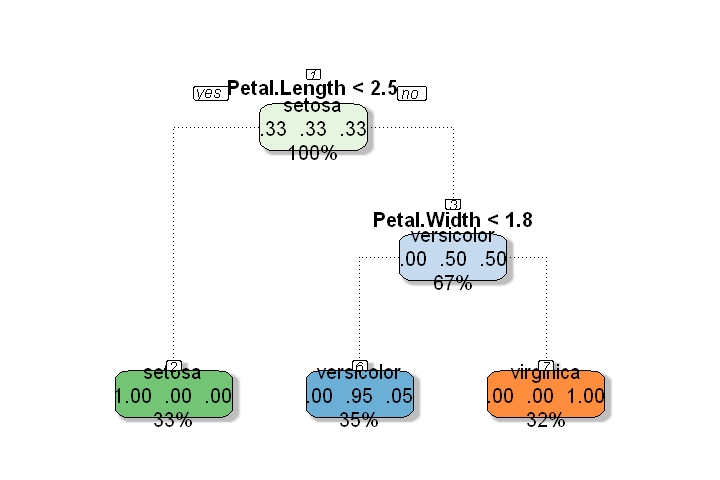

In [11]:
rattle::fancyRpartPlot(treeFit, type = 1, sub = "")

In [12]:
# run predicion on test dataset and leave out the label
# tmp = testSet[-5]
# fix(tmp)
Prediction1 <- predict(treeFit,newdata=testSet[-5],type = 'class')
# table(Prediction1)
# Prediction1

## Print the confusion matrix to check the accuracy
confusionMatrix(Prediction1,testSet$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         12         3
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.8974          
                 95% CI : (0.7578, 0.9713)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 3.435e-13       
                                          
                  Kappa : 0.8462          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9231           0.7692
Specificity                 1.0000            0.8846           0.9615
Pos Pred Value              1.0000            0.8000           0.9091
Neg Pred Value              1.0000            0.9583           0.8929
P

In [13]:
## Pruning the decision tree
printcp(treeFit)


Classification tree:
rpart(formula = Species ~ ., data = trainSet, method = "class")

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 74/111 = 0.66667

n= 111 

       CP nsplit rel error   xerror     xstd
1 0.50000      0  1.000000 1.189189 0.057705
2 0.47297      1  0.500000 0.783784 0.071115
3 0.01000      2  0.027027 0.067568 0.029529


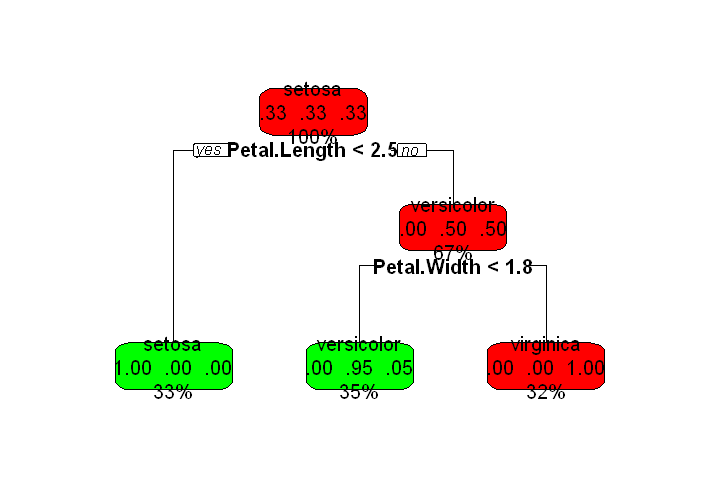

In [14]:
opt  <-  which.min(treeFit$cptable[,'xerror'])

cp <-  treeFit$cptable[opt, 'CP']
pruned_model <-  prune(treeFit,cp)
rpart.plot(pruned_model, box.col=c("red", "green"))

In [15]:
rpart_pruned_predict <- predict(pruned_model, newdata=testSet[-5],type = 'class')
mn2 <- mean(rpart_pruned_predict==testSet$Species)
mn2

[1] 0.8974359

In [16]:
confusionMatrix(rpart_pruned_predict,testSet$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         12         3
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.8974          
                 95% CI : (0.7578, 0.9713)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 3.435e-13       
                                          
                  Kappa : 0.8462          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9231           0.7692
Specificity                 1.0000            0.8846           0.9615
Pos Pred Value              1.0000            0.8000           0.9091
Neg Pred Value              1.0000            0.9583           0.8929
P

# RANDOM FOREST




In [17]:
# Train/validation split
set.seed(3) # for reproducibility
idx <- createDataPartition(factor(iris$Species), 
                           times = 1, # one time
                           p = 0.5, # 50% proportion
                           list = FALSE)

## train set
trainset <- iris[idx,] 
## validation set
validation_set <- iris[-idx,] %>% select(-Species)   
validation_labels <- iris[-idx,] %>% select(Species)

In [18]:
# Now, we are going to use the caret package to train our model.
control <- trainControl(method = "cv", # cross-validation
                        verboseIter = TRUE,
                        savePredictions = "final",
                        classProbs = TRUE) 

set.seed(1)
model <- train(Species ~ ., data = iris,
               trControl = control,
               maximize = TRUE,
               tuneGrid = data.frame(mtry = 4),
               method = "rf")

+ Fold01: mtry=4 
- Fold01: mtry=4 
+ Fold02: mtry=4 
- Fold02: mtry=4 
+ Fold03: mtry=4 
- Fold03: mtry=4 
+ Fold04: mtry=4 
- Fold04: mtry=4 
+ Fold05: mtry=4 
- Fold05: mtry=4 
+ Fold06: mtry=4 
- Fold06: mtry=4 
+ Fold07: mtry=4 
- Fold07: mtry=4 
+ Fold08: mtry=4 
- Fold08: mtry=4 
+ Fold09: mtry=4 
- Fold09: mtry=4 
+ Fold10: mtry=4 
- Fold10: mtry=4 
Aggregating results
Fitting final model on full training set


In [19]:
model

Random Forest 

150 samples
  5 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results:

  Accuracy   Kappa
  0.9533333  0.93 

Tuning parameter 'mtry' was held constant at a value of 4

In [20]:
confusionMatrix.train(model)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       31.3       2.7
  virginica     0.0        2.0      30.7
                            
 Accuracy (average) : 0.9533


In [21]:
val_preds <- predict(model, validation_set)

In [22]:
confusionMatrix(val_preds, validation_labels$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         25         0
  virginica       0          0        25

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.952, 1)
    No Information Rate : 0.3333    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            0.3333   

In [23]:
varImp(model)

rf variable importance

              Overall
Petal.Width  100.0000
Petal.Length  84.5522
Sepal.Length   1.4577
Sepal.Width    0.8123
train          0.0000

In [24]:
# Another library for random forest

# Set random seed to make results reproducible:
set.seed(17)
# Calculate the size of each of the data sets:
data_set_size <- floor(nrow(iris)/2)
# Generate a random sample of "data_set_size" indexes
indexes <- sample(1:nrow(iris), size = data_set_size)

# Assign the data to the correct sets
training <- iris[indexes,]
validation1 <- iris[-indexes,]

#import the package
library(randomForest)
# Perform training:
rf_classifier = randomForest(Species ~ ., data=training, ntree=100, mtry=2, importance=TRUE)
rf_classifier

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = Species ~ ., data = training, ntree = 100,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 8%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         27          0         0  0.00000000
versicolor      0         22         2  0.08333333
virginica       0          4        20  0.16666667

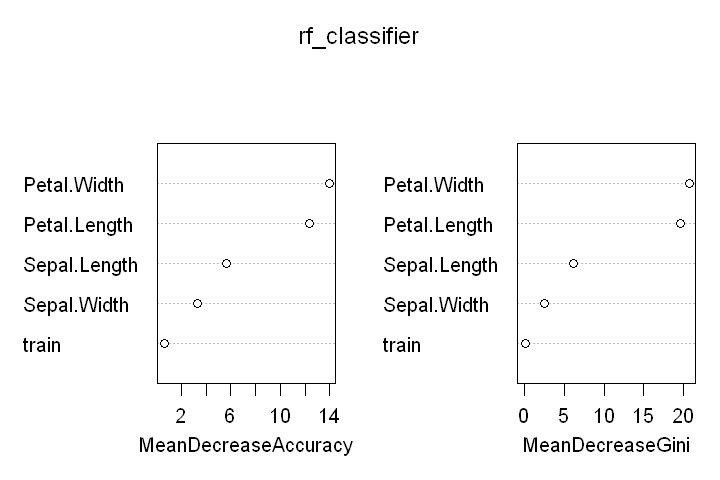

In [25]:
varImpPlot(rf_classifier)

In [26]:
# Validation set assessment #1: looking at confusion matrix
prediction_for_table <- predict(rf_classifier,validation1[,-5])

table(observed=validation1[,5],predicted=prediction_for_table)

            predicted
observed     setosa versicolor virginica
  setosa         23          0         0
  versicolor      0         26         0
  virginica       0          3        23

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[[1]]
[1] 1

[[1]]
[1] 0.9952904

[[1]]
[1] 0.9988226



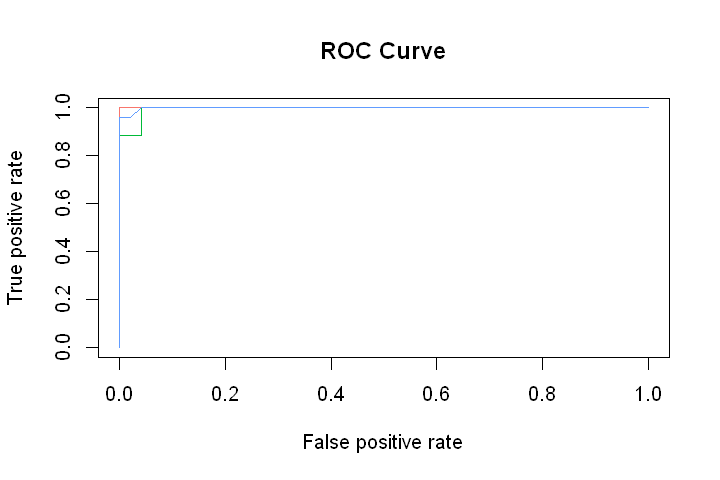

In [27]:
# Validation set assessment #2: ROC curves and AUC

# Needs to import ROCR package for ROC curve plotting:
library(ROCR)

# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- predict(rf_classifier,validation1[,-5],type="prob")

# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
classes <- levels(validation1$Species)
# For each class
for (i in 1:3)
{
 # Define which observations belong to class[i]
 true_values <- ifelse(validation1[,5]==classes[i],1,0)
 # Assess the performance of classifier for class[i]
 pred <- prediction(prediction_for_roc_curve[,i],true_values)
 perf <- performance(pred, "tpr", "fpr")
 if (i==1)
 {
     plot(perf,main="ROC Curve",col=pretty_colours[i]) 
 }
 else
 {
     plot(perf,main="ROC Curve",col=pretty_colours[i],add=TRUE) 
 }
 # Calculate the AUC and print it to screen
 auc.perf <- performance(pred, measure = "auc")
 print(auc.perf@y.values)
}